<a href="https://colab.research.google.com/github/SahelKherad/3-story-benchmark-transformer/blob/main/1404_05_25_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import scipy.io
from scipy.io.matlab._mio5_params import mat_struct
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/ASCE"


shm01a.mat  shm03a.mat	shm05a.mat  shm07a.mat	shm09a.mat
shm02a.mat  shm04a.mat	shm06a.mat  shm08a.mat


In [5]:
import scipy.io

folder_path = '/content/drive/MyDrive/ASCE/shm01a.mat'
data = scipy.io.loadmat(folder_path)

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'dasy', 'dasy_dscr', 'filedescription', 'fsdasy'])


In [8]:
print('header:', data['__header__'])
print('version:',data['__version__'])
print('File description: ', data['filedescription'])
print('description:',data['dasy_dscr'])
# print(data['dasy'])
raw_descriptions = data['dasy_dscr'][0][0]
extracted_strings = [item[0] for item in raw_descriptions]
df_description = pd.DataFrame(extracted_strings, columns=['Description'])
print(df_description)


header: b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sun Sep 29 12:53:06 2002'
version: 1.0
File description:  ['Type:a (Ambient Vibration/Filtered Data) --  Config01: Fully Braced Config     ']
description: [[(array(['Base West side - EPI sensor X direction (N+)'], dtype='<U44'), array(['Base Center - EPI sensor Y direction (W+)'], dtype='<U41'), array(['Base East side - EPI sensor X direction (N+)'], dtype='<U44'), array(['1st Floor - N/S EPI Sensor at West end (N+)'], dtype='<U43'), array(['1st Floor - E/W FBA Sensor at Center (W+)'], dtype='<U41'), array(['1st Floor - N/S FBA Sensor at East end (N+)'], dtype='<U43'), array(['2nd Floor - N/S FBA Sensor at West end (N+)'], dtype='<U43'), array(['2nd Floor - E/W EPI Sensor at Center (W+)'], dtype='<U41'), array(['2nd Floor - N/S EPI Sensor at East end (N+)'], dtype='<U43'), array(['3rd Floor - N/S EPI Sensor at West end (N+)'], dtype='<U43'), array(['3rd Floor - E/W EPI Sensor at Center (W+)'], dtype='<U41'), array(['3rd Floor 

In [9]:
def load_mat(path):
    mat = scipy.io.loadmat(path, squeeze_me=True, struct_as_record=False)
    raw = mat.get('dasy')
    if isinstance(raw, mat_struct):
        fields = raw._fieldnames
        channels = []
        for f in fields:
            arr = getattr(raw, f)
            channels.append(np.asarray(arr).reshape(-1))
        data = np.stack(channels, axis=1)     # → (n_samples, n_channels)

    return data, mat


base_dir = '/content/drive/MyDrive/ASCE/'

# state_files is a dictionary:{ label_1: "file1.mat", label_2: "file2.mat", ... }
# label is an integer or class ID (e.g., 0, 1, 2). fname is the name of a .mat file.
state_files = {
    1: 'shm01a.mat',   # state 1 → label 0
    2: 'shm02a.mat',   # state 2 → label 1
    3: 'shm03a.mat',   # state 3 → label 2
    4: 'shm04a.mat',   # state 4 → label 3
    5: 'shm05a.mat',   # state 5 → label 4
    6: 'shm06a.mat',   # state 6 → label 5
    7: 'shm07a.mat',   # state 7 → label 6
    8: 'shm08a.mat',   # state 8 → label 7
    9: 'shm09a.mat',   # state 9 → label 8
}

In [10]:
all_data, all_labels = [], []
for label, fname in state_files.items():
    path = os.path.join(base_dir, fname)
    dasy, mat = load_mat(path)
    print(f"{fname}: data shape = {dasy.shape}")
    all_data.append(dasy)
    all_labels.append(np.full(dasy.shape[0], label, dtype=np.int64))
print('Len Data == ',len(all_data))
all_data_concatenated = np.concatenate(all_data, axis=0)
all_label_concatenated = np.concatenate(all_labels)

print('all_data_concatenated: ', all_data_concatenated.shape)
print('all_label_concatenated: ', all_label_concatenated.shape)

# for i, arr in enumerate(all_data):
#     print(f"  Array {i+1}: {arr.shape}")



shm01a.mat: data shape = (60000, 16)
shm02a.mat: data shape = (60000, 16)
shm03a.mat: data shape = (60000, 16)
shm04a.mat: data shape = (60000, 16)
shm05a.mat: data shape = (60000, 16)
shm06a.mat: data shape = (45568, 16)
shm07a.mat: data shape = (180000, 16)
shm08a.mat: data shape = (180000, 16)
shm09a.mat: data shape = (180000, 16)
Len Data ==  9
all_data_concatenated:  (885568, 16)
all_label_concatenated:  (885568,)


In [11]:
data_state1 = all_data[0]
data_state2 = all_data[1]
# # data_state3 = all_data[2]
# # data_state4 = all_data[3]
# # data_state5 = all_data[4]
# # data_state6 = all_data[5]
# # data_state7 = all_data[6]
# # data_state8 = all_data[7]
# # data_state9 = all_data[8]
# # print(data_state1.dtype)
# # print(data_state1.shape)
# # print(data_state2.shape)
columns_to_delete = [0, 1, 2, -1]
data_state1 = np.delete(data_state1 ,columns_to_delete, axis=1)
data_state2 = np.delete(data_state2 ,columns_to_delete, axis=1)
print(data_state1.shape)
print(data_state2.shape)


(60000, 12)
(60000, 12)


In [ ]:
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data_state1 = scaler.fit_transform(data_state1)
# data_state2 = scaler.fit_transform(data_state2)

# print('data_state1', data_state1.shape)
# print('data_state_normalized', normalized_matrix.shape)

# # برای بررسی، حداقل و حداکثر مقادیر ستون اول ماتریس نرمال‌شده را چاپ کنید
# print("min", data_state1[:, 0].min())
# print("max", data_state1[:, 0].max())

# print("normalizedd_min", normalized_matrix[:, 0].min())
# print("normalized_max", normalized_matrix[:, 0].max())

# print(data_state1[:,0])

In [12]:
def segment_signal(x, L=512, S=256):
    n_samples, n_channels = x.shape
    n_windows = int(np.floor((n_samples - L) / S) + 1)
    windows = []

    for start in range(0, n_samples - L + 1, S):
        windows.append(x[start:start+L, 0:15])
    return np.stack(windows, axis=0)

seg1 = segment_signal(data_state1, L=512, S=256) # return(n_windows, L, n_channels)
seg2 = segment_signal(data_state2, L=512, S=256)
# seg3 = segment_signal(data_state3, L=1024, S=512)
# seg4 = segment_signal(data_state4, L=1024, S=512)
# seg5 = segment_signal(data_state5, L=1024, S=512)
# seg6 = segment_signal(data_state6, L=1024, S=512)
# seg7 = segment_signal(data_state7, L=1024, S=512)
# seg8 = segment_signal(data_state8, L=1024, S=512)
# seg9 = segment_signal(data_state9, L=1024, S=512)

print("State1 windows:", seg1.shape)
print("State2 windows:", seg2.shape)
# print("State3 windows:", seg3.shape)
# print("State4 windows:", seg4.shape)
# print("State5 windows:", seg5.shape)
# print("State6 windows:", seg6.shape)
# print("State7 windows:", seg7.shape)
# print("State8 windows:", seg8.shape)
# print("State9 windows:", seg9.shape)

State1 windows: (233, 512, 12)
State2 windows: (233, 512, 12)


In [13]:
X = np.vstack([seg1, seg2])
y = np.concatenate([
    np.zeros(len(seg1), dtype=np.int64),   # label 0 for state1
    np.ones(len(seg2),  dtype=np.int64),   # label 1 for state3
])

# X = np.vstack([seg1, seg2, seg3, seg4, seg5, seg6, seg7, seg8, seg9])
# y = np.concatenate([
#     np.zeros(len(seg1), dtype=np.int64),     # label 0 for state1
#     1*np.ones(len(seg2),  dtype=np.int64),   # label 1 for state2
#     2*np.ones(len(seg3),  dtype=np.int64),   # label 2 for state3
#     3*np.ones(len(seg4),  dtype=np.int64),   # label 3 for state4
#     4*np.ones(len(seg5),  dtype=np.int64),   # label 4 for state5
#     5*np.ones(len(seg6),  dtype=np.int64),   # label 5 for state6
#     6*np.ones(len(seg7),  dtype=np.int64),   # label 6 for state7
#     7*np.ones(len(seg8),  dtype=np.int64),   # label 7 for state8
#     8*np.ones(len(seg9),  dtype=np.int64),   # label 8 for state9

# ])
print("X shape:", X.shape)
print("y shape:", y.shape, "unique labels:", np.unique(y))


X shape: (466, 512, 12)
y shape: (466,) unique labels: [0 1]


In [38]:
from torch.utils.data import random_split
from torch.utils.data import TensorDataset

# # 1) Wrap in a Dataset
# class ASCEWindowDataset(torch.utils.data.Dataset):
#     def __init__(self, X, y):
#         # ensure tensors
#         if not isinstance(X, torch.Tensor):
#             X = torch.from_numpy(X).float()
#         if not isinstance(y, torch.Tensor):
#             y = torch.from_numpy(y).long()
#         self.X = X   # shape (N, L, C)
#         self.y = y   # shape (N,)
#     def __len__(self):
#         return len(self.y)
#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]

# dataset = ASCEWindowDataset(X, y)
print("Minimum label:", np.min(y))
print("Maximum label:", np.max(y))
print("Number of unique labels:", len(np.unique(y)))

dataset = TensorDataset(torch.from_numpy(X).float(), torch.from_numpy(y).long())


# 2) Split sizes
N = len(dataset)
n_train = int(0.8 * N)
n_val   = int(0.1 * N)
n_test  = N - n_train - n_val

train_ds, val_ds, test_ds = random_split(dataset, [n_train, n_val, n_test],
                                   generator=torch.Generator().manual_seed(42))

# 3) DataLoaders
batch_size =16

train_loader = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
val_loader   = DataLoader(val_ds,   batch_size = batch_size, shuffle = False)
test_loader  = DataLoader(test_ds,  batch_size = batch_size, shuffle = False)

# Sanity check
xb, yb = next(iter(train_loader))
print("train batch X:", xb.shape)  # (32, 1024, 15)
print("train batch y:", yb.shape)  # (32,)


Minimum label: 0
Maximum label: 1
Number of unique labels: 2
train batch X: torch.Size([16, 512, 12])
train batch y: torch.Size([16])


In [22]:
import torch
import torch.nn as nn

class TimeSeriesTransformer(nn.Module):
    def __init__(self,
                 n_channels=12,
                 d_model=128, # Dimension of the model's internal representation (hidden size)
                 n_heads=4,
                 num_layers=3, # Number of Transformer encoder layers
                 d_ff=256, # Dimension of the feed-forward network in each encoder layer
                 dropout=0.1,
                 seq_len=512,
                 num_classes=2):
        super().__init__()
        # 1) Project 15→d_model per time‐step
        self.input_proj = nn.Linear(in_features = n_channels, out_features = d_model)
        # This nn.Linear layer transforms each time step's features from n_channels to d_model.
        # It's like converting your sensor readings into a higher-dimensional, richer representation

        # 2) Learned positional embeddings
        self.pos_emb = nn.Parameter(torch.zeros(1, seq_len, d_model))
        #  This means the model will learn the best way to
        #  represent the position of each time step in the sequence.

        # 3) Transformer encoder layers (batch_first=True so input is (B, S, D))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_ff,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # 4) Classification head: from d_model → d_model//2 → num_classes
        #    *Notice the first Linear’s in_features = d_model*
        #    *and the final Linear’s in_features = d_model//2*
        self.classifier = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, d_model//2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(d_model//2, num_classes)
        )

    def forward(self, x):
        # x: (batch, seq_len, n_channels)

        # a) embed
        x = self.input_proj(x)                        # → (batch, seq_len, d_model)

        # b) add positional encoding
        x = x + self.pos_emb[:, :x.size(1), :]        # → (batch, seq_len, d_model)

        # c) encode
        x = self.transformer(x)                       # → (batch, seq_len, d_model)

        # d) **pool over the time axis** so we drop seq_len (1024)
        x = x.mean(dim=1)                             # → (batch, d_model)

        # e) classify
        return self.classifier(x)                     # → (batch, num_classes)


In [46]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class ClassBalancedCELoss(nn.Module):
#     def __init__(self, samples_per_class, beta=0.9999, reduction="mean"):
#         super().__init__()
#         self.beta = beta
#         self.reduction = reduction
#         effective_num = 1.0 - torch.pow(torch.tensor(beta), torch.tensor(samples_per_class))
#         weights = (1.0 - beta) / effective_num
#         weights = weights / weights.sum() * len(samples_per_class)  # normalize
#         self.weights = weights.float()

#     def forward(self, logits, targets):
#         return F.cross_entropy(logits, targets, weight=self.weights.to(logits.device), reduction=self.reduction)


In [39]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class FocalLoss(nn.Module):
#     def __init__(self, alpha=1.0, gamma=2.0, reduction="mean"):
#         super(FocalLoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma
#         self.reduction = reduction

#     def forward(self, logits, targets):
#         ce_loss = F.cross_entropy(logits, targets, reduction="none")
#         pt = torch.exp(-ce_loss)  # p_t = softmax probability for the true class
#         focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss

#         if self.reduction == "mean":
#             return focal_loss.mean()
#         elif self.reduction == "sum":
#             return focal_loss.sum()
#         else:
#             return focal_loss


In [52]:
# class DiceLossMulticlass(nn.Module):
#     def __init__(self, smooth=1.0, reduction="mean"):
#         super().__init__()
#         self.smooth, self.reduction = smooth, reduction
#     def forward(self, logits, targets):
#         # logits [N,C], targets [N]
#         probs = F.softmax(logits, dim=1)              # [N,C]
#         onehot = F.one_hot(targets, num_classes=logits.size(1)).float()  # [N,C]
#         intersect = (probs * onehot).sum(dim=0)       # [C]
#         denom = probs.sum(dim=0) + onehot.sum(dim=0)  # [C]
#         dice_c = (2*intersect + self.smooth) / (denom + self.smooth)
#         loss_c = 1 - dice_c                           # [C]
#         loss = loss_c.mean()
#         return loss



In [57]:
class CombinedFocalDiceLoss(nn.Module):
    def __init__(self, a1=1.0, a2=1.0, alpha=1.0, gamma=2.0, smooth=1.0):
        super().__init__()
        self.a1 = a1   # weight for focal
        self.a2 = a2   # weight for dice
        self.alpha = alpha
        self.gamma = gamma
        self.smooth = smooth

    def forward(self, logits, targets):
        # ----- Focal Loss -----
        ce = F.cross_entropy(logits, targets, reduction="none")
        pt = torch.exp(-ce)                      # prob of true class
        focal = self.alpha * (1 - pt)**self.gamma * ce
        focal = focal.mean()

        # ----- Dice Loss (multiclass version) -----
        probs = F.softmax(logits, dim=1)         # [N,2]
        onehot = F.one_hot(targets, num_classes=logits.size(1)).float()  # [N,2]
        intersect = (probs * onehot).sum(dim=0)
        denom = probs.sum(dim=0) + onehot.sum(dim=0)
        dice_c = (2 * intersect + self.smooth) / (denom + self.smooth)
        dice_loss = (1 - dice_c).mean()

        # ----- Weighted sum -----
        return self.a1 * focal + self.a2 * dice_loss

In [53]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model  = TimeSeriesTransformer(
    n_channels=12,
    d_model=128,
    n_heads=4,
    num_layers=3,
    d_ff=256,
    dropout=0.1,
    seq_len=512,
    num_classes=2
).to(device)


optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-2)
# criterion = nn.CrossEntropyLoss()
# criterion = FocalLoss(alpha=1.0, gamma=2.0, reduction="mean")
# criterion = DiceLoss()
criterion = DiceLossMulticlass()
# criterion = ClassBalancedCELoss(samples_per_class=[60000,60000], beta=0.9999, reduction="mean")

criterion = CombinedFocalDiceLoss(a1=1.0, a2=1.0, alpha=1.0, gamma=2.0, smooth=1.0)


Using device: cpu


In [58]:
train_losses = []
val_losses   = []
train_accs   = []
val_accs     = []


In [26]:
%env CUDA_LAUNCH_BLOCKING=1

env: CUDA_LAUNCH_BLOCKING=1


In [59]:
from sklearn.metrics import accuracy_score

def train_epoch(loader):
    model.train()
    running_loss = 0.0
    preds, targets = [], []
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * xb.size(0)
        preds.extend(logits.argmax(dim=1).cpu().tolist())
        targets.extend(yb.cpu().tolist())

    avg_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(targets, preds)
    return avg_loss, acc

def eval_epoch(loader):
    model.eval()
    running_loss = 0.0
    preds, targets = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)

            running_loss += loss.item() * xb.size(0)
            preds.extend(logits.argmax(dim=1).cpu().tolist())
            targets.extend(yb.cpu().tolist())

    avg_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(targets, preds)
    return avg_loss, acc


In [60]:
num_epochs = 10
best_val_acc = 0.0

for epoch in range(1, num_epochs+1):
    train_loss, train_acc = train_epoch(train_loader)
    val_loss, val_acc     = eval_epoch(val_loader)
    # scheduler.step()

    train_losses.append(train_loss)
    train_accs  .append(train_acc)
    val_losses  .append(val_loss)
    val_accs    .append(val_acc)

    print(f"Epoch {epoch:02d} │ "
          f"Train: loss={train_loss:.4f}, acc={train_acc:.3f} ││ "
          f"Val:   loss={val_loss:.4f}, acc={val_acc:.3f}")

    # save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_asce_transformer.pt")
        print("  ↳ new best, model saved.")
print(len(train_losses))

Epoch 01 │ Train: loss=0.4793, acc=0.516 ││ Val:   loss=0.4720, acc=0.457
  ↳ new best, model saved.
Epoch 02 │ Train: loss=0.4754, acc=0.487 ││ Val:   loss=0.4709, acc=0.457
Epoch 03 │ Train: loss=0.4770, acc=0.481 ││ Val:   loss=0.4720, acc=0.457
Epoch 04 │ Train: loss=0.4759, acc=0.511 ││ Val:   loss=0.4721, acc=0.457
Epoch 05 │ Train: loss=0.4766, acc=0.454 ││ Val:   loss=0.4722, acc=0.457
Epoch 06 │ Train: loss=0.4753, acc=0.505 ││ Val:   loss=0.4724, acc=0.457
Epoch 07 │ Train: loss=0.4797, acc=0.511 ││ Val:   loss=0.4732, acc=0.457
Epoch 08 │ Train: loss=0.4795, acc=0.516 ││ Val:   loss=0.4700, acc=0.543
  ↳ new best, model saved.
Epoch 09 │ Train: loss=0.4743, acc=0.524 ││ Val:   loss=0.4725, acc=0.457
Epoch 10 │ Train: loss=0.4805, acc=0.522 ││ Val:   loss=0.4735, acc=0.457
10


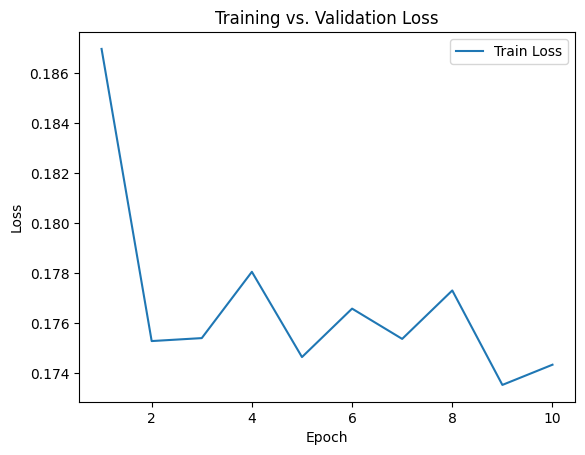

In [45]:
import matplotlib.pyplot as plt

epochs = list(range(1, len(train_losses) + 1))

plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
# plt.plot(epochs, val_losses,   label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()


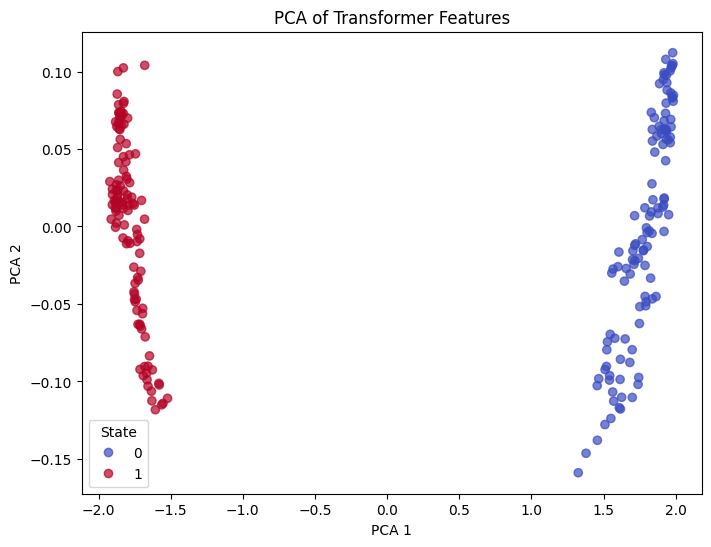

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


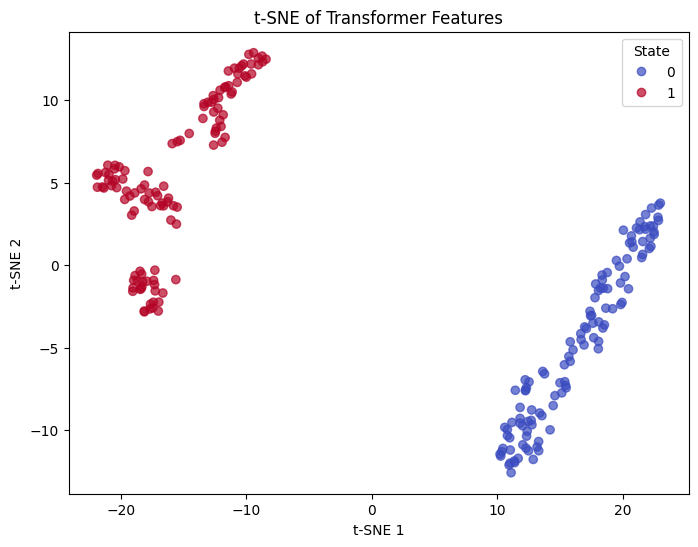

In [ ]:
# ─── Cell E ───
# [Training loop here]
# At the end, you have a trained model in memory or you load the best checkpoint:
model.load_state_dict(torch.load("best_asce_transformer.pt"))
model.eval()
# ────────────────────────────────────────────────────────────

# ─── Cell F (new) ───
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# (1) Move model to CPU for visualization
model_cpu = model.to('cpu')

# (2) Create a DataLoader over the entire dataset (no shuffling)
full_loader = DataLoader(dataset, batch_size=64, shuffle=False)

# (3) Extract the d_model‐dim feature for each window by forwarding through everything
all_features = []
all_labels   = []
with torch.no_grad():
    for xb, yb in full_loader:
        xb = xb.cpu()
        # Manually run up through the transformer, stopping at the pooled output:
        x_proj   = model_cpu.input_proj(xb)                             # (B, L, d_model)
        x_pos    = x_proj + model_cpu.pos_emb[:, :x_proj.size(1), :]     # add pos emb
        x_trans  = model_cpu.transformer(x_pos)                          # (B, L, d_model)
        features = x_trans.mean(dim=1)                                   # (B, d_model)
        all_features.append(features.numpy())
        all_labels.append(yb.numpy())

# (4) Stack everything into arrays
features_array = np.vstack(all_features)   # shape: (n_windows, d_model)
labels_array   = np.concatenate(all_labels)

# (5) PCA → 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_array)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    pca_result[:,0], pca_result[:,1],
    c=labels_array, cmap='coolwarm', alpha=0.7
)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Transformer Features')
plt.legend(*scatter.legend_elements(), title="State")
plt.show()

# (6) t-SNE → 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, init='pca', random_state=42)
tsne_result = tsne.fit_transform(features_array)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    tsne_result[:,0], tsne_result[:,1],
    c=labels_array, cmap='coolwarm', alpha=0.7
)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Transformer Features')
plt.legend(*scatter.legend_elements(), title="State")
plt.show()
# ────────────────────────────────────────────────────────────


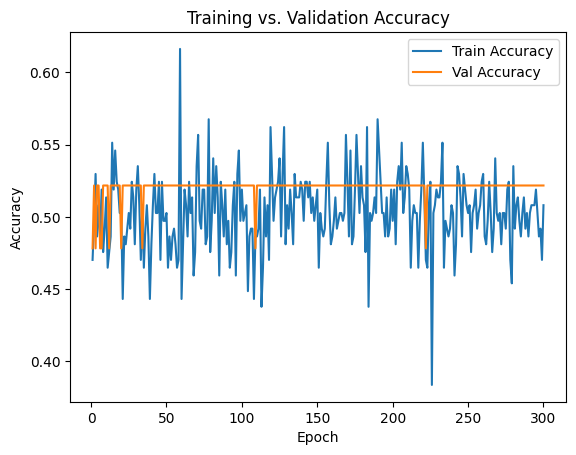

In [ ]:
plt.figure()
plt.plot(epochs, train_accs, label='Train Accuracy')
plt.plot(epochs, val_accs,   label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()


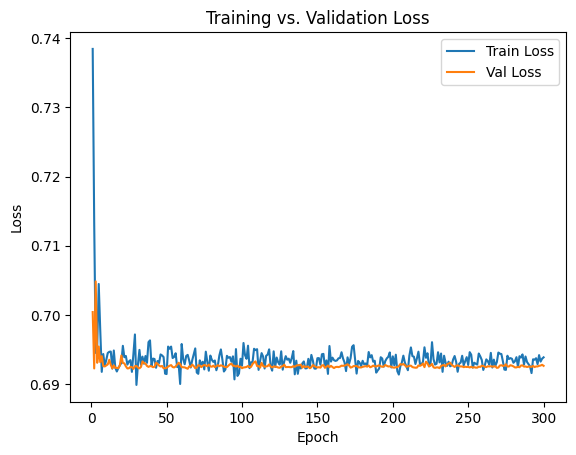

Confusion Matrix:
              Pred State1  Pred State2
True State1            0           14
True State2            0           10


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import torch

# 1) Plot training & validation loss
epochs = list(range(1, len(train_losses) + 1))
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses,   label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

# 2) Compute confusion matrix on the test set
model.eval()
# Move model to CPU before inference to match data device
model_cpu = model.to('cpu')
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        # Move data to CPU to match model device
        xb, yb = xb.to('cpu'), yb.to('cpu')
        logits = model_cpu(xb)
        preds = logits.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_targets.extend(yb.cpu().numpy())

# Build & display as a DataFrame
cm = confusion_matrix(all_targets, all_preds)
df_cm = pd.DataFrame(cm,
    index=['True State1','True State2'],
    columns=['Pred State1','Pred State2']
    # index=['True State1','True State2','True State3','True State4','True State5', 'True State6', 'True State7', 'True State8','True State9'],
    # columns=['Pred State1','Pred State2','Pred State3','Pred State4', 'Pred State5', 'Pred State6', 'Pred State7', 'Pred State8', 'Pred State9']
)
print("Confusion Matrix:\n", df_cm)